# Library


In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from datetime import datetime
from glob import glob

In [2]:
# 소수점 옵션
pd.options.display.float_format = '{:.2f}'.format
# pd.reset_option('display.float_format')

## 시각화 library

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [5]:
# 음수 표현
plt.rcParams['axes.unicode_minus'] = False

In [6]:
# plotly, cufflinks 로드
import plotly
import cufflinks as cf

In [7]:
# 오프라인 모드에서도 인터렉티브한 그래픽을 가능하도록 하기
# Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

# fold path

In [3]:
drive = 'D'

In [4]:
raw_fold = f'{drive}:/data/big2/BD1/raw'
ods_fold = f'{drive}:/data/big2/ODS'
sample_fold = f'{drive}:/data/big2/BD1/sample'
analysis_fold = f'{drive}:/data/big2/BD1/an'
img = f'{drive}:/data/big2/BD1/img'

# Load

## result 최종(전체)

In [5]:
# about 17.5s
name = '4등급_차량_리스트_양식_result_최종(전체)(2023.04.18_PM.02.12.53)'
file_name = f'{name}.csv'
rs = pd.read_csv(os.path.join(raw_fold, file_name), low_memory=False, encoding='cp949')
rs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502235 entries, 0 to 1502234
Data columns (total 36 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   차대번호        1502235 non-null  object 
 1   차량번호        1502235 non-null  object 
 2   제원관리번호      1502235 non-null  object 
 3   차종          1502235 non-null  object 
 4   용도          1502235 non-null  object 
 5   최초등록일       1502235 non-null  int64  
 6   연식          1502235 non-null  int64  
 7   제작일자        1335178 non-null  float64
 8   검사유효일       1502223 non-null  float64
 9   배출가스인증번호    1384783 non-null  object 
 10  등급          1502235 non-null  int64  
 11  차명          1502235 non-null  object 
 12  차종분류        1502235 non-null  object 
 13  차종유형        1502235 non-null  object 
 14  자동차형식       1501958 non-null  object 
 15  제작사명        1492590 non-null  object 
 16  연료          1502235 non-null  object 
 17  엔진형식        1500400 non-null  object 
 18  총중량         1502234 no

## 정기&정밀(최근3년)

In [6]:
# about 4m 24.0s
name = '[ODS]정기&정밀검사(최신검사만)(2022.12.28)'
file_name = f'{name}.csv'
ins = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False)
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22044208 entries, 0 to 22044207
Data columns (total 42 columns):
 #   Column     Dtype  
---  ------     -----  
 0   사용연료       object 
 1   주행거리       object 
 2   차명         object 
 3   차량번호       object 
 4   차대번호       object 
 5   차종         object 
 6   차량연식       int64  
 7   엔진형식       object 
 8   검사방법       object 
 9   검사일자       int64  
 10  검사종류       object 
 11  검사판정시각     object 
 12  검사판정       object 
 13  산소값        float64
 14  이산화탄소값     float64
 15  무부하매연판정1   object 
 16  무부하매연판정2   object 
 17  무부하매연판정3   object 
 18  무부하매연판정4   object 
 19  무부하매연판정5   object 
 20  무부하매연판정6   object 
 21  무부하매연허용치1  float64
 22  무부하매연허용치2  float64
 23  무부하매연허용치3  float64
 24  무부하매연허용치4  float64
 25  무부하매연허용치5  float64
 26  무부하매연허용치6  float64
 27  무부하매연측정치1  float64
 28  무부하매연측정치2  float64
 29  무부하매연측정치3  float64
 30  무부하매연측정치4  float64
 31  무부하매연측정치5  float64
 32  무부하매연측정치6  float64
 33  차량용도       object 
 34  최대출력허용치    float

# 데이터 확인

In [7]:
rs['등급_수정'].value_counts(dropna=False)

4.00    1497711
3.00       4397
5.00        127
Name: 등급_수정, dtype: int64

In [8]:
rs['연료'].value_counts(dropna=False)

경유             1153813
휘발유             323019
LPG(액화석유가스)      25400
알코올                  1
기타연료                 1
CNG(압축천연가스)          1
Name: 연료, dtype: int64

In [9]:
rs['말소여부'].value_counts(dropna=False)

N    1502235
Name: 말소여부, dtype: int64

In [10]:
rs[['배인번호_수정', '등급_수정', 'DPF유무_수정']].isnull().sum()

배인번호_수정     348422
등급_수정            0
DPF유무_수정    348422
dtype: int64

In [12]:
# 경유 유니목1200 : 5등급
rs.loc[(rs['연료'] == '경유') & (rs['차명'] == '유니목1200'), '등급_수정']

1150788   5.00
Name: 등급_수정, dtype: float64

In [13]:
# 9MY-AD-14-04 : 4등급
rs.loc[rs['배인번호_수정'] == '9MY-AD-14-04', '등급_수정'].unique()

array([4.])

In [14]:
# 한불모터스 : 1대 3등급
rs.loc[rs['제작사명'] == '한불모터스(주)', '등급_수정'].value_counts(dropna=False)

4.00    4383
3.00       1
Name: 등급_수정, dtype: int64

In [15]:
# 연료 : 기타연료 1대
rs['연료'].value_counts(dropna=False)

경유             1153813
휘발유             323019
LPG(액화석유가스)      25400
알코올                  1
기타연료                 1
CNG(압축천연가스)          1
Name: 연료, dtype: int64

# 전처리

## result와 정기&정밀 병합

In [12]:
ins.columns

Index(['사용연료', '주행거리', '차명', '차량번호', '차대번호', '차종', '차량연식', '엔진형식', '검사방법',
       '검사일자', '검사종류', '검사판정시각', '검사판정', '산소값', '이산화탄소값', '무부하매연판정1',
       '무부하매연판정2', '무부하매연판정3', '무부하매연판정4', '무부하매연판정5', '무부하매연판정6', '무부하매연허용치1',
       '무부하매연허용치2', '무부하매연허용치3', '무부하매연허용치4', '무부하매연허용치5', '무부하매연허용치6',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연측정치4', '무부하매연측정치5',
       '무부하매연측정치6', '차량용도', '최대출력허용치', '최대출력측정값', '검사접수번호', '검사소명', '재검사기간',
       '정기정밀', '검사 검사소코드', '검사유효기간'],
      dtype='object')

In [13]:
ins1 = ins[['차대번호', '검사방법', '검사종류', '검사판정', '산소값', '이산화탄소값',
           '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연판정4', '무부하매연판정5', '무부하매연판정6', 
           '무부하매연허용치1', '무부하매연허용치2', '무부하매연허용치3', '무부하매연허용치4', '무부하매연허용치5', '무부하매연허용치6',
           '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연측정치4', '무부하매연측정치5', '무부하매연측정치6', 
           '정기정밀']]
ins1.shape

(22044208, 25)

In [14]:
rs.shape

(1502235, 36)

In [15]:
df = rs.merge(ins1, on='차대번호', how='left')
df.shape

(1502235, 60)

### [출력] result 정기&정밀 병합

In [16]:
today_date = datetime.today().strftime("%Y.%m.%d_%p.%I.%M.%S")
today_date

'2023.04.18_PM.02.21.14'

In [17]:
# about 34.5s
df.to_csv(os.path.join(raw_fold, f'4등급_차량_리스트_양식_result_최종(전체)(정기&정밀)({today_date}).csv'), index=False)

## 경유만 추출

In [18]:
df.shape

(1502235, 60)

In [19]:
df1 = df.copy()

In [20]:
df['연료'].value_counts(dropna=False)

경유             1153813
휘발유             323019
LPG(액화석유가스)      25400
알코올                  1
기타연료                 1
CNG(압축천연가스)          1
Name: 연료, dtype: int64

In [21]:
df1 = df[df['연료'] == '경유'].reset_index(drop=True)
df1.shape

(1153813, 60)

## 4등급 차량만 추출

In [22]:
df1['등급_수정'].value_counts(dropna=False)

4.00    1149289
3.00       4397
5.00        127
Name: 등급_수정, dtype: int64

In [23]:
df1 = df1[df1['등급_수정'] == 4].reset_index(drop=True)
df1.shape

(1149289, 60)

## 차대번호 10자리 연식

In [24]:
df1['vin10'] = df1['차대번호'].str[9]

In [25]:
vin10_dict = {'J':1988, 'K':1989, 'L':1990, 'M':1991, 'N':1992, 'P':1993, 'R':1994, 'S':1995, 'T':1996, 'V':1997, 'W':1998, 'X':1999, 'Y':2000, '1':2001, '2':2002, '3':2003, '4':2004, '5':2005, '6':2006, '7':2007, '8':2008, '9':2009, 'A':2010, 'B':2011, 'C':2012, 'D':2013, 'E':2014, 'F':2015, 'G':2016, 'H':2017}

In [26]:
df1['vin10_year'] = df1['vin10'].map(vin10_dict, na_action='ignore')

## 배인번호_수정 문자 타입으로 변경

In [27]:
df1['배인번호_수정'] = df1['배인번호_수정'].astype('str')

## 차대번호 17자리 샘플

In [28]:
df2y = df1.loc[df1['차대번호'].str.len() == 17].reset_index(drop=True)
df2n = df1.loc[df1['차대번호'].str.len() != 17].reset_index(drop=True)
df2y.shape, df2n.shape

((1149280, 62), (9, 62))

### [출력] 샘플-차대번호17자리 아닌

In [29]:
# today_date = datetime.today().strftime("%Y.%m.%d_%p.%I.%M.%S")
# df2n.to_excel(os.path.join(sample_fold, f'통합_샘플_차대번호17자리아닌_{today_date}.xlsx'), index=False)

## 차대번호 연식과 연식 동일한 샘플

In [30]:
df3y = df2y.loc[df2y['vin10_year'] == df2y['연식']].reset_index(drop=True)
df3n = df2y.loc[df2y['vin10_year'] != df2y['연식']].reset_index(drop=True)
df3y.shape, df3n.shape

((1149221, 62), (59, 62))

### [출력] 샘플-배인연식 다른

In [31]:
# today_date = datetime.today().strftime("%Y.%m.%d_%p.%I.%M.%S")
# df3n.to_excel(os.path.join(sample_fold, f'통합_샘플_차대번호17자리_차량연식다른_{today_date}.xlsx'), index=False)

## 통계(검사종류별, 검사방법별, 측정치 개수)

In [32]:
col = '무부하매연측정치'
agg = 'count'
statics = df1.groupby(['검사종류', '검사방법']).agg({f'{col}1':agg, f'{col}2':agg, f'{col}3':agg, f'{col}4':agg, f'{col}5':agg, f'{col}6':agg})
statics

무부하매연측정치1  무부하매연측정치2  무부하매연측정치3  무부하매연측정치4  \
검사종류       검사방법                                                           
1부재검사(종합)  무부하검사(급가속)              715        715        335        335   
           부하검사(KD-147)          16830       6508       6508       6508   
           부하검사(LUG DOWN)         1172       1172       1172       1172   
2부재검사(종합)  무부하검사(급가속)             2591       2591       1000       1000   
           부하검사(KD-147)          78151      26546      26545      26545   
           부하검사(LUG DOWN)         6436       6436       6436       6436   
재검사(1부재검사) 무부하검사(급가속)            18394          0          0          0   
재검사(2부재검사) 무부하검사(급가속)            31176          0          0          0   
정기(경과)검사   무부하검사(급가속)            11874          0          0          0   
정기검사       무부하검사(급가속)           170622          0          0          0   
           무부하검사(정지가동)               2          2          2          0   
종합검사       무부하검사(급가속)            48154      48154      19362      19362   
           부하검사(ASM-Idling)          2          2          2          2   
           부하검사(KD-147)         642380     219844     219842     219842   
           부하검사(LUG DOWN)        30265      30265      30265      30265   
종합검사(경과)   무부하검사(급가속)             3637       3637       1149       1149   
           부하검사(KD-147)          51833      14587      14587      14587   
           부하검사(LUG DOWN)         3893       3893       3893       3893   

                             무부하매연측정치5  무부하매연측정치6  
검사종류       검사방법                                    
1부재검사(종합)  무부하검사(급가속)              335        335  
           부하검사(KD-147)           6508       6508  
           부하검사(LUG DOWN)         1172        338  
2부재검사(종합)  무부하검사(급가속)             1000       1000  
           부하검사(KD-147)          26545      26544  
           부하검사(LUG DOWN)         6436       1513  
재검사(1부재검사) 무부하검사(급가속)                0          0  
재검사(2부재검사) 무부하검사(급가속)                0          0  
정기(경과)검사   무부하검사(급가속)                0          0  
정기검사       무부하검사(급가속)                0          0  
           무부하검사(정지가동)               0          0  
종합검사       무부하검사(급가속)            19362      19362  
           부하검사(ASM-Idling)          2          2  
           부하검사(KD-147)         219842     219840  
           부하검사(LUG DOWN)        30265       8273  
종합검사(경과)   무부하검사(급가속)             1149       1149  
           부하검사(KD-147)          14587      14587  
           부하검사(LUG DOWN)         3893       1055

In [33]:
today_date = datetime.today().strftime("%Y.%m.%d_%p.%I.%M.%S")
today_date

'2023.04.18_PM.02.21.56'

### [출력] 통계

In [34]:
# statics.to_excel(os.path.join(analysis_fold, f'통계 result(4등급_경유) 검사종류 검사방법별 측정치 개수({today_date}).xlsx'))

### 제원관리번호 오류 확인

In [35]:
df1.loc[df1['배출가스인증번호'] == '4MY-AD-20', '제원관리번호'].value_counts()

02420000100031305    29
Name: 제원관리번호, dtype: int64

# [test] 배출가스 인증번호별 분석
- [해결] issue
    - 배인번호 없음 : 9MY-KM-14-22
        - 차명 : 쏘렌토
        - 등급변경 : 3 -> 4

## [로드] 배인번호 파일

In [36]:
# 4MY-AD-20
# 5MY-BK-14-07
# 6MY-BK-13-08
# 6MY-MK-14-02

# 5MY-HD-24-35
# 8MY-PA-14-03

In [37]:
test_df = pd.DataFrame()

In [38]:
emis_no = '4MY-AD-20'
gas_df = df1.loc[df1['배인번호_수정'] == emis_no]
gas_df.shape

(30, 62)

### 전처리
- 제거
    - 차대번호 17자리 아닌 샘플
    - 차대번호 10자리와 차량연식이 다른 샘플

#### [출력] 차대번호17자리 아닌 샘플

In [39]:
vin17y = gas_df[(gas_df['차대번호'].str.len() == 17)].reset_index(drop=True)
vin17n = gas_df[(gas_df['차대번호'].str.len() != 17)].reset_index(drop=True)
vin17y.shape, vin17n.shape

((30, 62), (0, 62))

In [40]:
# vin17n.to_excel(os.path.join(sample_fold, f'샘플_차대번호17자리아닌_{emis_no}.xlsx'), index=False)

#### [출력] 차대번호10자리 연도와 차량연식 다른 샘플

In [41]:
vin17y_vin10y = vin17y[vin17y['vin10_year'] == vin17y['연식']].reset_index(drop=True)
vin17y_vin10n = vin17y[vin17y['vin10_year'] != vin17y['연식']].reset_index(drop=True)
vin17y_vin10y.shape, vin17y_vin10n.shape

((30, 62), (0, 62))

In [42]:
# vin17y_vin10n.to_excel(os.path.join(sample_fold, f'샘플_차대번호17자리_차량연식다른_{emis_no}.xlsx'), index=False)

### 분석
- 제원관리번호별, 자동차형식별, 엔진형식별, 검사판정별 무부하매연측정치1 통계

In [43]:
vin17y_vin10y['무부하매연측정치1'].dtype

dtype('float64')

In [44]:
vin17y_vin10y['무부하매연측정치1'].isnull().sum()

2

In [45]:
def flat_cols(df):
    df.columns = ['/'.join(x) for x in df.columns.to_flat_index()]
    return df

In [46]:
vin17y_vin10y.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '인증번호 수정 유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', '배출가스', '등급2',
       'DPF', '비고', '검사방법', '검사종류', '검사판정', '산소값', '이산화탄소값', '무부하매연판정1',
       '무부하매연판정2', '무부하매연판정3', '무부하매연판정4', '무부하매연판정5', '무부하매연판정6', '무부하매연허용치1',
       '무부하매연허용치2', '무부하매연허용치3', '무부하매연허용치4', '무부하매연허용치5', '무부하매연허용치6',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연측정치4', '무부하매연측정치5',
       '무부하매연측정치6', '정기정밀', 'vin10', 'vin10_year'],
      dtype='object')

In [47]:
vin17y_vin10y['검사종류'].unique()

array(['종합검사', nan, '재검사(2부재검사)', '정기검사', '정기(경과)검사', '종합검사(경과)'],
      dtype=object)

In [48]:
vin17y_vin10y['검사방법'].unique()

array(['무부하검사(급가속)', nan], dtype=object)

In [49]:
groupby_col1 = ['제작사명', '배인번호_수정', '제원관리번호', '자동차형식', '엔진형식', '검사종류', '검사방법', '검사판정']
g = vin17y_vin10y.groupby(groupby_col1).agg({'차대번호':'count', '무부하매연측정치1':['mean', 'min', 'max']}).pipe(flat_cols).round(2).reset_index()
g = g.rename(columns={'배인번호_수정':'배출가스인증번호', '차대번호/count':'대수', '무부하매연측정치1/mean':'mean', '무부하매연측정치1/min':'min', '무부하매연측정치1/max':'max'})

In [50]:
g

,제작사명,배출가스인증번호,제원관리번호,자동차형식,엔진형식,검사종류,검사방법,검사판정,대수,mean,min,max
0,아우디폭스바겐코리아(주),4MY-AD-20,02420000100031305,4F,BMK,재검사(2부재검사),무부하검사(급가속),Y,1,19.00,19.00,19.00
1,아우디폭스바겐코리아(주),4MY-AD-20,02420000100031305,4F,BMK,정기(경과)검사,무부하검사(급가속),Y,2,6.00,0.00,12.00
2,아우디폭스바겐코리아(주),4MY-AD-20,02420000100031305,4F,BMK,정기검사,무부하검사(급가속),N,1,21.00,21.00,21.00
3,아우디폭스바겐코리아(주),4MY-AD-20,02420000100031305,4F,BMK,정기검사,무부하검사(급가속),Y,3,16.00,2.00,26.00
4,아우디폭스바겐코리아(주),4MY-AD-20,02420000100031305,4F,BMK,종합검사,무부하검사(급가속),N,1,51.00,51.00,51.00
5,아우디폭스바겐코리아(주),4MY-AD-20,02420000100031305,4F,BMK,종합검사,무부하검사(급가속),Y,15,12.33,0.00,31.00
6,아우디폭스바겐코리아(주),4MY-AD-20,02420000100031305,4F,BMK,종합검사(경과),무부하검사(급가속),Y,4,15.00,11.00,17.00
7,자기인증면제차량,4MY-AD-20,00031124022261309,4F,BMK,종합검사,무부하검사(급가속),Y,1,2.00,2.00,2.00


In [51]:
groupby_col2 = ['제작사명', '배출가스인증번호', '제원관리번호', '자동차형식', '엔진형식', '검사종류', '검사방법']
g.groupby(groupby_col2)['대수'].transform('sum')

0     1
1     2
2     4
3     4
4    16
5    16
6     4
7     1
Name: 대수, dtype: int64

In [52]:
g['합격률(%)'] = round(g['대수'] / g.groupby(groupby_col2)['대수'].transform('sum') * 100, 2)
g

,제작사명,배출가스인증번호,제원관리번호,자동차형식,엔진형식,검사종류,검사방법,검사판정,대수,mean,min,max,합격률(%)
0,아우디폭스바겐코리아(주),4MY-AD-20,02420000100031305,4F,BMK,재검사(2부재검사),무부하검사(급가속),Y,1,19.00,19.00,19.00,100.00
1,아우디폭스바겐코리아(주),4MY-AD-20,02420000100031305,4F,BMK,정기(경과)검사,무부하검사(급가속),Y,2,6.00,0.00,12.00,100.00
2,아우디폭스바겐코리아(주),4MY-AD-20,02420000100031305,4F,BMK,정기검사,무부하검사(급가속),N,1,21.00,21.00,21.00,25.00
3,아우디폭스바겐코리아(주),4MY-AD-20,02420000100031305,4F,BMK,정기검사,무부하검사(급가속),Y,3,16.00,2.00,26.00,75.00
4,아우디폭스바겐코리아(주),4MY-AD-20,02420000100031305,4F,BMK,종합검사,무부하검사(급가속),N,1,51.00,51.00,51.00,6.25
5,아우디폭스바겐코리아(주),4MY-AD-20,02420000100031305,4F,BMK,종합검사,무부하검사(급가속),Y,15,12.33,0.00,31.00,93.75
6,아우디폭스바겐코리아(주),4MY-AD-20,02420000100031305,4F,BMK,종합검사(경과),무부하검사(급가속),Y,4,15.00,11.00,17.00,100.00
7,자기인증면제차량,4MY-AD-20,00031124022261309,4F,BMK,종합검사,무부하검사(급가속),Y,1,2.00,2.00,2.00,100.00


In [53]:
test_df = pd.concat([test_df, g], ignore_index=True)

In [54]:
test_df

,제작사명,배출가스인증번호,제원관리번호,자동차형식,엔진형식,검사종류,검사방법,검사판정,대수,mean,min,max,합격률(%)
0,아우디폭스바겐코리아(주),4MY-AD-20,02420000100031305,4F,BMK,재검사(2부재검사),무부하검사(급가속),Y,1,19.00,19.00,19.00,100.00
1,아우디폭스바겐코리아(주),4MY-AD-20,02420000100031305,4F,BMK,정기(경과)검사,무부하검사(급가속),Y,2,6.00,0.00,12.00,100.00
2,아우디폭스바겐코리아(주),4MY-AD-20,02420000100031305,4F,BMK,정기검사,무부하검사(급가속),N,1,21.00,21.00,21.00,25.00
3,아우디폭스바겐코리아(주),4MY-AD-20,02420000100031305,4F,BMK,정기검사,무부하검사(급가속),Y,3,16.00,2.00,26.00,75.00
4,아우디폭스바겐코리아(주),4MY-AD-20,02420000100031305,4F,BMK,종합검사,무부하검사(급가속),N,1,51.00,51.00,51.00,6.25
5,아우디폭스바겐코리아(주),4MY-AD-20,02420000100031305,4F,BMK,종합검사,무부하검사(급가속),Y,15,12.33,0.00,31.00,93.75
6,아우디폭스바겐코리아(주),4MY-AD-20,02420000100031305,4F,BMK,종합검사(경과),무부하검사(급가속),Y,4,15.00,11.00,17.00,100.00
7,자기인증면제차량,4MY-AD-20,00031124022261309,4F,BMK,종합검사,무부하검사(급가속),Y,1,2.00,2.00,2.00,100.00


# 배인번호별 분석

In [55]:
def flat_cols(df):
    df.columns = ['/'.join(x) for x in df.columns.to_flat_index()]
    return df

In [56]:
# about 11.9s
# 최적화 24m 51s -> 11.9s 시간 99% 절감, 처리 속도 124배 증가
total_g_df = pd.DataFrame()
groupby_col1 = ['제작사명', '배인번호_수정', '제원관리번호', '자동차형식', '엔진형식', '검사종류', '검사방법', '검사판정']
groupby_col2 = ['제작사명', '배출가스인증번호', '제원관리번호', '자동차형식', '엔진형식', '검사종류', '검사방법']
for one in tqdm(df3y['배인번호_수정'].unique()):
    # 배인번호별 df
    gas_df = df3y.loc[df3y['배인번호_수정'] == str(one)].reset_index(drop=True)

    if gas_df.shape[0] != 0:
        # 제번별, 차형식별, 엔진형식별, 검사판정별 무부하매연측정치1 통계
        g = gas_df.groupby(groupby_col1).agg({'차대번호':'count', '무부하매연측정치1':['mean', 'min', 'max']}).pipe(flat_cols).round(2).reset_index()
        g = g.rename(columns={'배인번호_수정':'배출가스인증번호', '차대번호/count':'대수', '무부하매연측정치1/mean':'mean', '무부하매연측정치1/min':'min', '무부하매연측정치1/max':'max'})
        # 하나의 배인번호에서 제번별 엔진형식별 비율 계산
        g['합격률(%)'] = round(g['대수'] / g.groupby(groupby_col2)['대수'].transform('sum') * 100, 2)
        # 종합 - 통계
        total_g_df = pd.concat([total_g_df, g], ignore_index=True)
    else:
        print(f'오류 배인번호 : {one}')
        pass

100%|██████████| 141/141 [00:11<00:00, 11.86it/s]


In [57]:
total_g_df.head()

,제작사명,배출가스인증번호,제원관리번호,자동차형식,엔진형식,검사종류,검사방법,검사판정,대수,mean,min,max,합격률(%)
0,아우디폭스바겐코리아(주),4MY-AD-20,02420000100031305,4F,BMK,재검사(2부재검사),무부하검사(급가속),Y,1,19.00,19.00,19.00,100.00
1,아우디폭스바겐코리아(주),4MY-AD-20,02420000100031305,4F,BMK,정기(경과)검사,무부하검사(급가속),Y,2,6.00,0.00,12.00,100.00
2,아우디폭스바겐코리아(주),4MY-AD-20,02420000100031305,4F,BMK,정기검사,무부하검사(급가속),N,1,21.00,21.00,21.00,25.00
3,아우디폭스바겐코리아(주),4MY-AD-20,02420000100031305,4F,BMK,정기검사,무부하검사(급가속),Y,3,16.00,2.00,26.00,75.00
4,아우디폭스바겐코리아(주),4MY-AD-20,02420000100031305,4F,BMK,종합검사,무부하검사(급가속),N,1,51.00,51.00,51.00,6.25


In [58]:
total_g_df.shape

(28491, 13)

In [59]:
'nan' in total_g_df['배출가스인증번호'].unique()

False

In [60]:
'확인불가' in total_g_df['배출가스인증번호'].unique()

True

In [61]:
total_g_df1 = total_g_df.loc[(total_g_df['배출가스인증번호'] != '확인불가') | (total_g_df['배출가스인증번호'] != 'nan')]
total_g_df1.shape

(28491, 13)

## [출력] 통계 배인번호별 매연값

In [62]:
today_date = datetime.today().strftime("%Y.%m.%d_%p.%I.%M.%S")
today_date

'2023.04.18_PM.02.22.10'

In [63]:
# about 6.2s
total_g_df1.to_excel(os.path.join(analysis_fold, f'통계_4등급_경유차_배인번호별_매연_{today_date}.xlsx'), index=False)

## 데이터 확인

In [64]:
df3y.shape

(1149221, 62)

In [65]:
total_g_df1['대수'].sum()

1126710

In [66]:
df3y[df3y['배인번호_수정'] == '확인불가'].shape

(6648, 62)

In [67]:
df2n[df2n['배인번호_수정'] == '확인불가'].shape

(0, 62)

In [68]:
df3n[df3n['배인번호_수정'] == '확인불가'].shape

(8, 62)

In [69]:
df[df['배인번호_수정'] == '확인불가'].shape

(6661, 60)

# 시각화

In [52]:
df.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', '주행거리', '차량연식', '검사방법', '검사일자',
       '검사종류', '검사판정시각', '검사판정', '산소값', '이산화탄소값', '무부하매연판정1', '무부하매연판정2',
       '무부하매연판정3', '무부하매연판정4', '무부하매연판정5', '무부하매연판정6', '무부하매연허용치1',
       '무부하매연허용치2', '무부하매연허용치3', '무부하매연허용치4', '무부하매연허용치5', '무부하매연허용치6',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연측정치4', '무부하매연측정치5',
       '무부하매연측정치6', '정기정밀'],
      dtype='object')

In [53]:
len(df['시도명'].unique())

17

In [54]:
df['차종'].unique()

array(['승용', '특수', '승합', '화물'], dtype=object)

In [55]:
df['용도'].unique()

array(['자가용', '관용', '영업용'], dtype=object)

In [56]:
local_use = df.groupby(['시도명', '용도'])['차대번호'].count().reset_index()
local_use

,시도명,용도,차대번호
0,강원도,관용,289
1,강원도,영업용,667
2,강원도,자가용,45914
3,경기도,관용,840
4,경기도,영업용,10130
5,경기도,자가용,255335
6,경상남도,관용,405
7,경상남도,영업용,2518
8,경상남도,자가용,93733
9,경상북도,관용,423


In [57]:
local_use = local_use.rename(columns={'차대번호':'차량수'})
local_use.columns

Index(['시도명', '용도', '차량수'], dtype='object')

## Bubble Chart

<AxesSubplot:title={'center':'시도별 4등급 경유차 "용도"'}, xlabel='시도명', ylabel='차량수'>

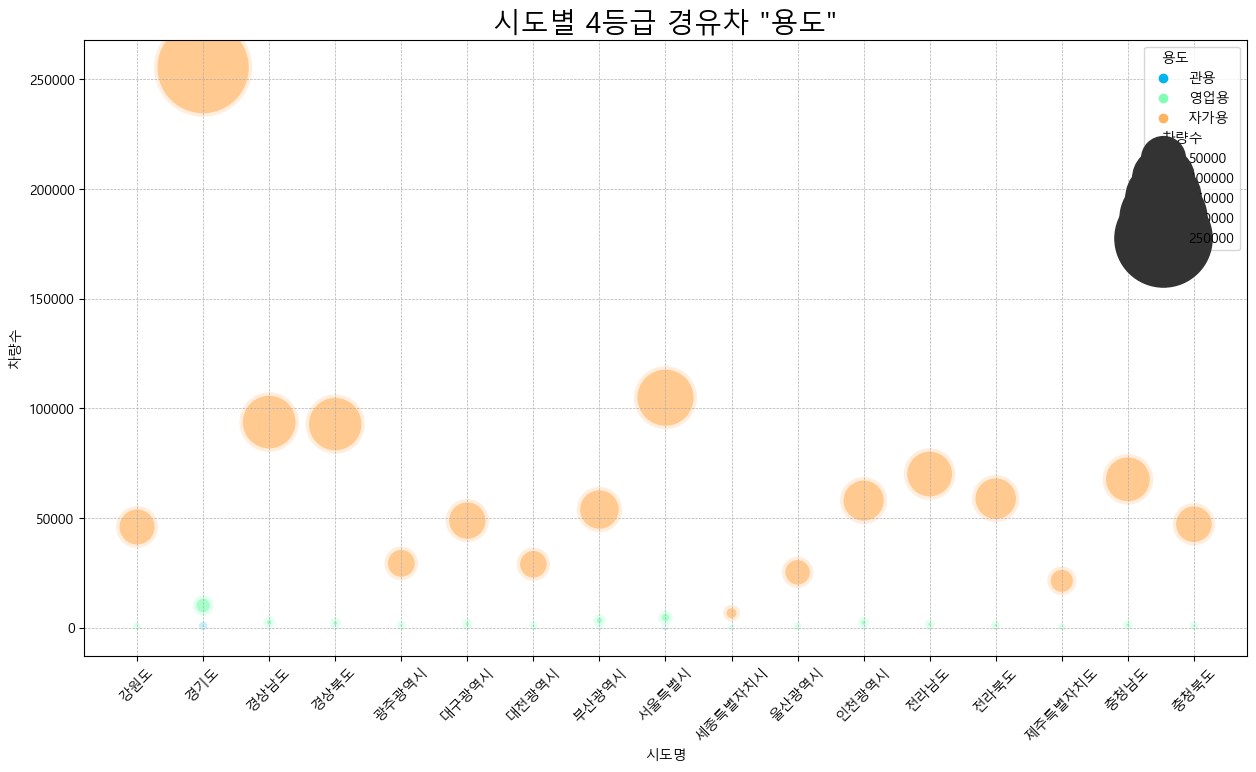

In [58]:
plt.figure(figsize=(15, 8))
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.title('시도별 4등급 경유차 "용도"', fontdict={'fontsize':20}, zorder=10)
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
sns.scatterplot(data=local_use, x='시도명', y='차량수', hue='용도', size='차량수', sizes=(20, 5000), legend=True, alpha=0.7, palette="rainbow", edgecolors="black", linewidth=5)

<AxesSubplot:title={'center':'시도별 4등급 경유차 "용도"'}, xlabel='시도명', ylabel='차량수'>

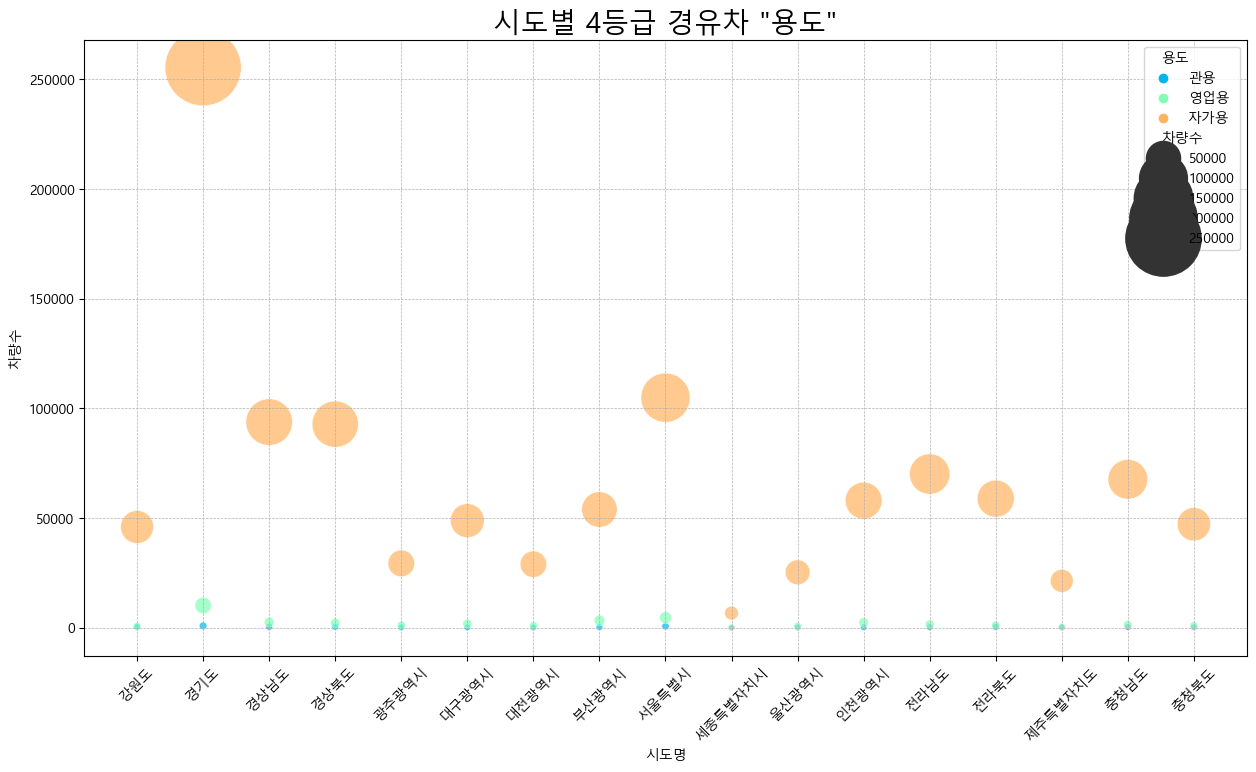

In [59]:
plt.figure(figsize=(15, 8))
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.title('시도별 4등급 경유차 "용도"', fontdict={'fontsize':20}, zorder=10)
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
sns.scatterplot(data=local_use, x='시도명', y='차량수', hue='용도', size='차량수', sizes=(20, 3000), legend=True, alpha=0.7, palette="rainbow")

## Pie chart1

In [60]:
temp = local_use.loc[local_use['시도명'] == '서울특별시']

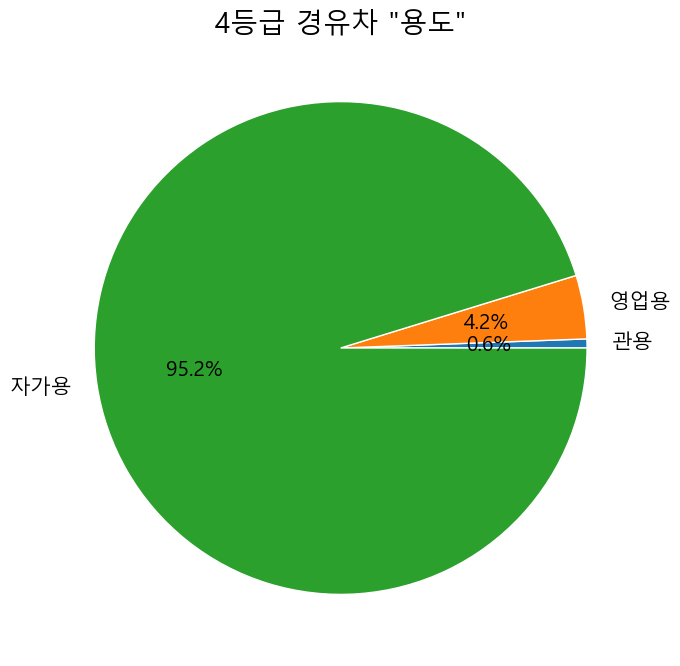

In [61]:
plt.figure(figsize=(8, 8))
plt.title('4등급 경유차 "용도"', fontdict={'fontsize':20}, zorder=10)
plt.pie(temp['차량수'], labels=temp['용도'], autopct='%.1f%%', textprops={'fontsize':'15'}, wedgeprops = {'linewidth':1, 'edgecolor':'white'});
plt.savefig(os.path.join(img, '서울특별시 4등급 경유차 용도(pie1).png'))

## Pie chart2

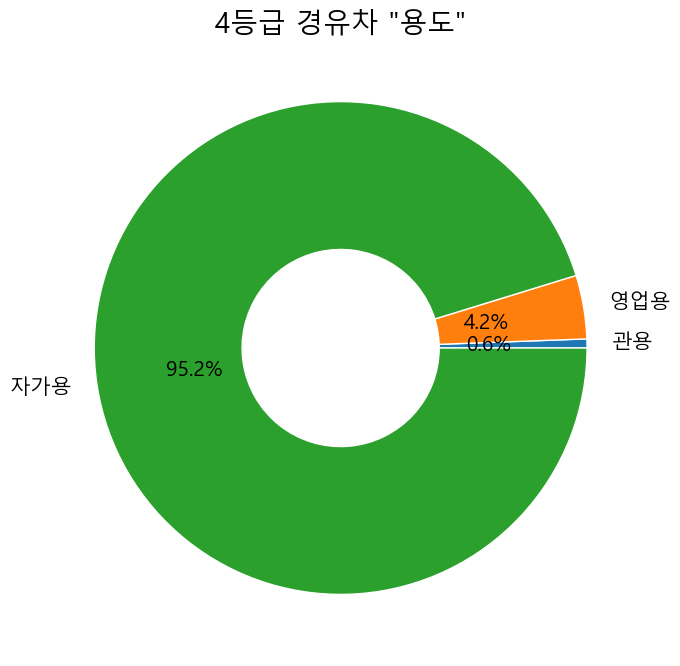

In [62]:
plt.figure(figsize=(8, 8))
plt.title('4등급 경유차 "용도"', fontdict={'fontsize':20}, zorder=10)
plt.pie(temp['차량수'], labels=temp['용도'], autopct='%.1f%%', textprops={'fontsize':'15'}, wedgeprops = {'width': 0.6, 'edgecolor': 'w', 'linewidth': 1});
plt.savefig(os.path.join(img, '서울특별시 4등급 경유차 용도(pie2).png'))

In [81]:
# plt.figure(figsize=(8, 8))
# for one in local_use['시도명'].unique():
#     temp = local_use.loc[local_use['시도명'] == one]
#     plt.title(f'{one} 4등급 경유차 용도별 차량 수', fontdict={'fontsize':20}, zorder=10)
#     plt.pie(temp['차량수'], labels=temp['용도'], autopct='%.1f%%', textprops={'fontsize':'15'}, wedgeprops = {'linewidth':1, 'edgecolor':'white'});
#     plt.savefig(os.path.join(img, f'{one} 4등급 경유차 용도(pie).png'))
#     plt.clf()

<Figure size 800x800 with 0 Axes>

In [82]:
# plt.figure(figsize=(8, 8))
# for one in local_use['시도명'].unique():
#     temp = local_use.loc[local_use['시도명'] == one]
#     plt.title(f'{one} 4등급 경유차 용도별 차량 수', fontdict={'fontsize':20}, zorder=10)
#     plt.pie(temp['차량수'], labels=temp['용도'], autopct='%.1f%%', textprops={'fontsize':'15'}, wedgeprops = {'width': 0.6, 'edgecolor': 'w', 'linewidth': 1});
#     plt.savefig(os.path.join(img, f'{one} 4등급 경유차 용도(pie2).png'))
#     plt.clf()

<Figure size 800x800 with 0 Axes>

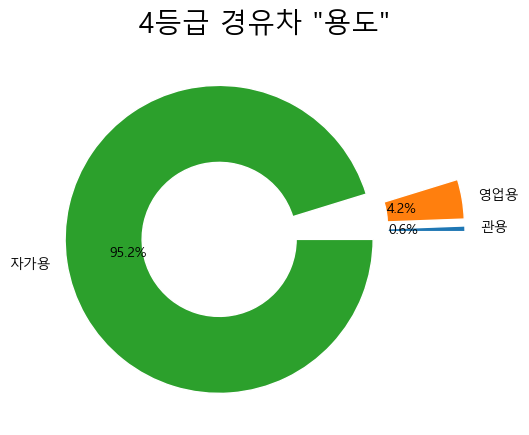

In [63]:
explode = [0.3, 0.3, 0.3]
wedgeprops={'width': 0.5, 'edgecolor': 'w', 'linewidth': 1}
plt.figure(figsize=(8, 5))
plt.title('4등급 경유차 "용도"', fontdict={'fontsize':20}, zorder=10)
plt.pie('차량수', labels='용도', autopct='%.1f%%', explode=explode, wedgeprops=wedgeprops, data=temp);

In [64]:
local_use = df.groupby(['시도명', '차종'])['차대번호'].count().reset_index()
local_use

,시도명,차종,차대번호
0,강원도,승용,19886
1,강원도,승합,4955
2,강원도,특수,162
3,강원도,화물,21867
4,경기도,승용,130808
...,...,...,...
63,충청남도,화물,33354
64,충청북도,승용,20641
65,충청북도,승합,5470
66,충청북도,특수,220


In [65]:
local_use = local_use.rename(columns={'차대번호':'차량수'})

In [66]:
temp = local_use.loc[local_use['시도명'] == '서울특별시']
temp

,시도명,차종,차량수
32,서울특별시,승용,59769
33,서울특별시,승합,16021
34,서울특별시,특수,345
35,서울특별시,화물,33968


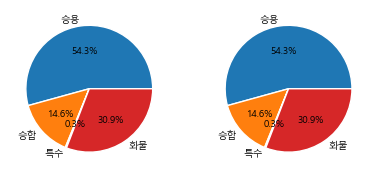

In [67]:
plt.figure(figsize=(15, 7))
plt.title('서울특별시 4등급 경유차 "차종"', fontdict={'fontsize':20}, zorder=10)
plt.subplot(3, 6, 1)
plt.pie(temp['차량수'], labels=temp['차종'], autopct='%.1f%%', textprops={'fontsize':'7'}, wedgeprops = {'linewidth':1, 'edgecolor':'white'});
plt.subplot(3, 6, 2)
plt.pie(temp['차량수'], labels=temp['차종'], autopct='%.1f%%', textprops={'fontsize':'7'}, wedgeprops = {'linewidth':1, 'edgecolor':'white'});

In [97]:
# plt.figure(figsize=(8, 8))
# for one in local_use['시도명'].unique():
#     temp = local_use.loc[local_use['시도명'] == one]
#     plt.title(f'{one} 4등급 경유차 차종별 차량 수', fontdict={'fontsize':20}, zorder=10)
#     plt.pie(temp['차량수'], labels=temp['차종'], autopct='%.1f%%', textprops={'fontsize':'15'}, wedgeprops = {'linewidth':1, 'edgecolor':'white'});
#     plt.savefig(os.path.join(img, f'{one} 4등급 경유차 차종(pie).png'))
#     plt.clf()

<Figure size 800x800 with 0 Axes>

## Pie chart3

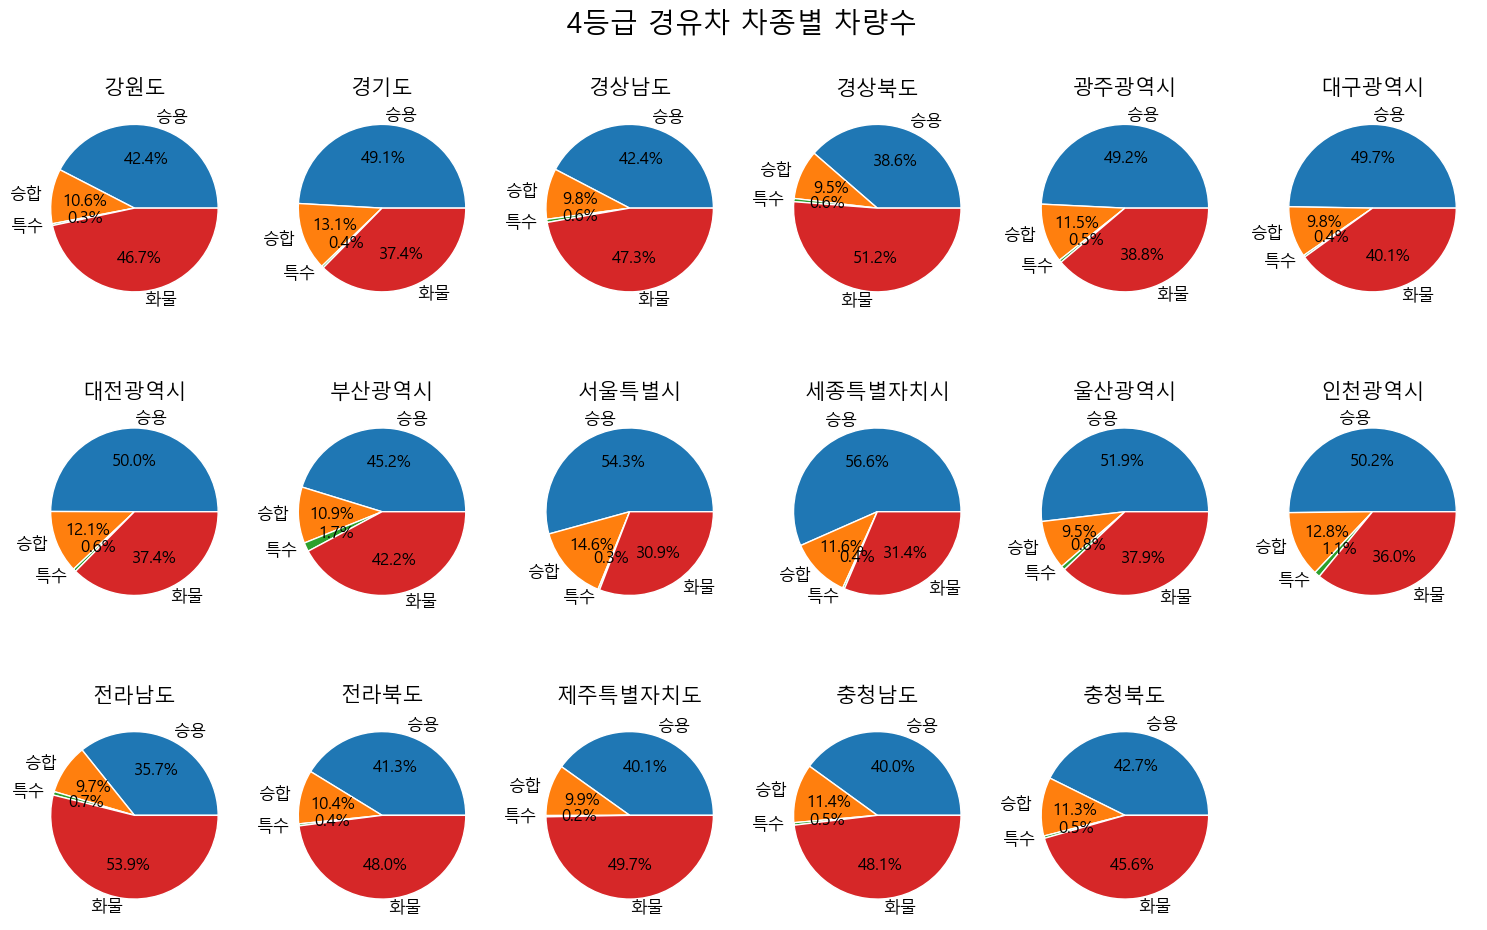

In [68]:
plt.figure(figsize=(15, 10))
i = 1
for one in local_use['시도명'].unique():
    temp = local_use.loc[local_use['시도명'] == one]
    plt.subplot(3, 6, i)
    plt.pie(temp['차량수'], labels=temp['차종'], autopct='%.1f%%', textprops={'fontsize':'12'}, wedgeprops = {'linewidth':1, 'edgecolor':'white'});
    plt.title(f'{one}', fontdict={'fontsize':15}, zorder=10)
    i += 1
plt.suptitle('4등급 경유차 차종별 차량수', fontsize=20)
plt.tight_layout()
plt.savefig(os.path.join(img, '4등급 경유차 차종(pie).png'))
plt.show()

In [69]:
temp1 = local_use.loc[local_use['시도명'] == '서울특별시']
temp1

,시도명,차종,차량수
32,서울특별시,승용,59769
33,서울특별시,승합,16021
34,서울특별시,특수,345
35,서울특별시,화물,33968


In [70]:
temp2 = local_use.loc[local_use['시도명'] == '경기도']
temp2

,시도명,차종,차량수
4,경기도,승용,130808
5,경기도,승합,34909
6,경기도,특수,1049
7,경기도,화물,99539


## Line chart

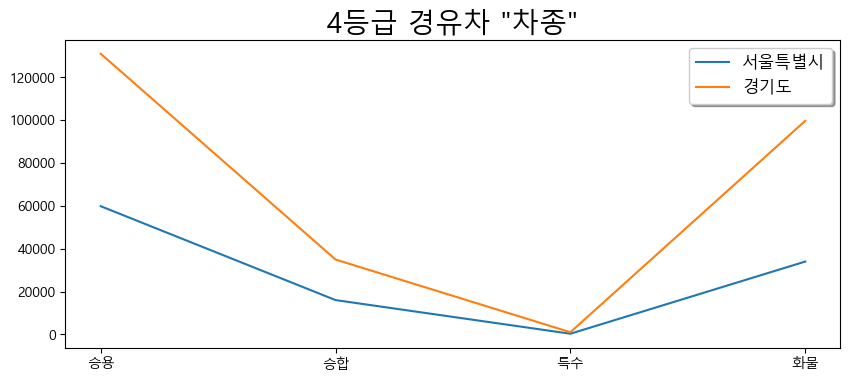

In [79]:
plt.figure(figsize=(10, 4))
plt.title('4등급 경유차 "차종"', fontdict={'fontsize':20}, zorder=10)
plt.plot(temp1['차종'], temp1['차량수'], label='서울특별시')
plt.plot(temp2['차종'], temp2['차량수'], label='경기도')
plt.legend(shadow='on', fontsize=12)
plt.show()

## plotly

In [72]:
local = df.groupby(['시도명', '차종'])['차대번호'].count().unstack('시도명').reset_index()
local

시도명,차종,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
0,승용,19886,130808,40936,36847,15057,25246,14987,25979,59769,3834,13546,30378,25706,24896,8754,27743,20641
1,승합,4955,34909,9457,9099,3502,4996,3623,6233,16021,787,2476,7727,6954,6267,2161,7887,5470
2,특수,162,1049,581,590,150,186,170,986,345,24,208,665,492,233,53,332,220
3,화물,21867,99539,45682,48871,11868,20330,11220,24227,33968,2128,9886,21773,38757,28956,10843,33354,22038


In [73]:
local.columns

Index(['차종', '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도',
       '충청북도'],
      dtype='object', name='시도명')

In [74]:
local_t = local.T.reset_index()
local_t

,시도명,0,1,2,3
0,차종,승용,승합,특수,화물
1,강원도,19886,4955,162,21867
2,경기도,130808,34909,1049,99539
3,경상남도,40936,9457,581,45682
4,경상북도,36847,9099,590,48871
5,광주광역시,15057,3502,150,11868
6,대구광역시,25246,4996,186,20330
7,대전광역시,14987,3623,170,11220
8,부산광역시,25979,6233,986,24227
9,서울특별시,59769,16021,345,33968


In [75]:
local_t.columns = ['시도명' ,'승용', '승합', '특수', '화물']
local_t

,시도명,승용,승합,특수,화물
0,차종,승용,승합,특수,화물
1,강원도,19886,4955,162,21867
2,경기도,130808,34909,1049,99539
3,경상남도,40936,9457,581,45682
4,경상북도,36847,9099,590,48871
5,광주광역시,15057,3502,150,11868
6,대구광역시,25246,4996,186,20330
7,대전광역시,14987,3623,170,11220
8,부산광역시,25979,6233,986,24227
9,서울특별시,59769,16021,345,33968


In [76]:
local_t = local_t.iloc[1:].reset_index(drop=True)
local_t

,시도명,승용,승합,특수,화물
0,강원도,19886,4955,162,21867
1,경기도,130808,34909,1049,99539
2,경상남도,40936,9457,581,45682
3,경상북도,36847,9099,590,48871
4,광주광역시,15057,3502,150,11868
5,대구광역시,25246,4996,186,20330
6,대전광역시,14987,3623,170,11220
7,부산광역시,25979,6233,986,24227
8,서울특별시,59769,16021,345,33968
9,세종특별자치시,3834,787,24,2128


In [77]:
local_t = local_t[['시도명', '승용', '승합', '화물', '특수']]
local_t

,시도명,승용,승합,화물,특수
0,강원도,19886,4955,21867,162
1,경기도,130808,34909,99539,1049
2,경상남도,40936,9457,45682,581
3,경상북도,36847,9099,48871,590
4,광주광역시,15057,3502,11868,150
5,대구광역시,25246,4996,20330,186
6,대전광역시,14987,3623,11220,170
7,부산광역시,25979,6233,24227,986
8,서울특별시,59769,16021,33968,345
9,세종특별자치시,3834,787,2128,24


### Bar chart

In [78]:
# plotly 이용 막대 그래프 그리기
local_t.iplot(kind='bar', x="시도명", xTitle = '시도명', yTitle='차량수', title="4등급 경유차 차종별 차량수")

### Stack chart

In [89]:
# plotly 이용 막대 그래프 그리기
local_t.iplot(kind='bar', x="시도명", xTitle = '시도명', yTitle='차량수', title="4등급 경유차 차종별 차량수", barmode='stack')

## [출력] 4등급 경유차 시도별 차종별 차량수

In [50]:
# local_t.to_excel(os.path.join(raw_fold, '4등급_경유차_시도별_차종별_차량수.xlsx'), index=False)

# code end